#**Install Requirement Library**

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
sns.set()

In [2]:
#Dataset from Bogazici University Kandilli Observatory and Earthquake Research Institute data for earthquakes in Turkey.
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/EarthquakeResearchInstitute/earthquake.txt"
earthquake = pd.read_csv(dataset, delimiter = "\t", header=0,
                         names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
#earthquake

In [3]:
data1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/EarthquakeResearchInstitute/2000-2007.txt"
data2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/EarthquakeResearchInstitute/2007-2010.txt"
data3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/EarthquakeResearchInstitute/2010-2013.txt"
data4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/EarthquakeResearchInstitute/2013-2015.txt"
data5 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/EarthquakeResearchInstitute/2015-2020.txt"

df1 = pd.read_csv(data1, delimiter = "\t", header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df2 = pd.read_csv(data2, delimiter = "\t", header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df3 = pd.read_csv(data3, delimiter = "\t", header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df4 = pd.read_csv(data4, delimiter = "\t", header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df5 = pd.read_csv(data5, delimiter = "\t", header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
frames = [df1,df2,df3,df4,df5]
data = pd.concat(frames, names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"] )
data = data.drop(['ID'], axis=1)
data.insert(0, 'ID', range(1, 1 + len(data)))
data

,ID,Code,Date,Time,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb,Type,Location
0,1,20070101225652,2007.01.01,22:56:52.56,39.0950,29.5383,7.3,3.0,3.0,0.0,NaN,0.0,0.0,Ke,YENIGUNEY-GEDIZ (KÜTAHYA) [North West 1.4 km]
1,2,20070101173108,2007.01.01,17:31:08.60,41.0678,34.3403,8.2,3.0,3.0,0.0,NaN,0.0,0.0,Ke,INCECAY-KARGI (ÇORUM) [North East 1.5 km]
2,3,20070101164425,2007.01.01,16:44:25.59,40.2313,29.3232,22.0,2.5,2.5,0.0,NaN,0.0,0.0,Ke,DUDAKLI-KESTEL (BURSA) [East 0.6 km]
3,4,20070101104921,2007.01.01,10:49:21.51,36.7965,33.7145,14.9,3.0,3.0,0.0,NaN,0.0,0.0,Ke,KICAKOY-SILIFKE (MERSIN) [North 8.8 km]
4,5,20070101091754,2007.01.01,09:17:54.64,36.8147,33.6768,13.1,3.0,3.0,0.0,NaN,0.0,0.0,Ke,BALLI-MUT (MERSIN) [South East 10.2 km]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46299,159580,20150101093011,2015.01.01,09:30:11.98,38.3350,39.0410,8.7,2.4,0.0,2.4,NaN,0.0,0.0,Ke,ILINCAK-SIVRICE (ELAZIG) [South East 1.3 km]
46300,159581,20150101072700,2015.01.01,07:27:00.96,36.3547,28.8493,8.0,2.7,0.0,2.7,NaN,0.0,0.0,Ke,AKDENIZ
46301,159582,20150101045211,2015.01.01,04:52:11.93,38.9120,43.5203,5.6,2.0,0.0,2.0,NaN,0.0,0.0,Ke,COLPAN- (VAN) [North West 2.3 km]
46302,159583,20150101042051,2015.01.01,04:20:51.91,39.4328,29.1060,9.9,2.3,0.0,2.3,NaN,0.0,0.0,Ke,ORENCIK-SIMAV (KUTAHYA) [South East 1.4 km]


In [4]:
data.insert(3,"Year", data["Date"].str[0:4], True) #loc, column_name,value,repeating_val

In [5]:
data.dtypes
#ID: shows event sequence.
#Code: Unic ID for event [YYYYMMDDHHMMSS].
#Date: Date of event : YYYY.MM.DD.
#Time: Origin time of event (UTC) --> HH:MM:SS.MS.
#Latitude, Longtitude: in decimal degrees.
#Depth(km): Depth of the event in kilometers,
#xM: Biggest magnitude values (MD, ML, Mw, Ms and Mb).
#MD ML Mw Ms Mb: Magnitude types (MD: Duration, ML: Local, Mw: Moment, Ms: Surface wave, Mb: Body-wave).

ID              int64
Code            int64
Date           object
Year           object
Time           object
Latitude      float64
Longtitude    float64
Depth(KM)     float64
xM            float64
MD            float64
ML            float64
Mw            float64
Ms            float64
Mb            float64
Type           object
Location       object
dtype: object

In [6]:
#checking for correlation
data.corr()

<ipython-input-6-88554c5c05dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,Code,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb
ID,1.000000,0.881559,-0.137894,-0.067324,-0.060574,-0.434355,-0.736833,0.646612,-0.189930,-0.010377,-0.044644
Code,0.881559,1.000000,-0.181269,-0.048231,-0.041165,-0.461830,-0.806908,0.716365,-0.096408,-0.013805,-0.045091
Latitude,-0.137894,-0.181269,1.000000,0.158397,-0.172903,-0.027947,0.139738,-0.166916,-0.061543,-0.000256,-0.026356
Longtitude,-0.067324,-0.048231,0.158397,1.000000,-0.067068,0.095381,0.037483,-0.004558,0.020682,0.001992,0.032788
Depth(KM),-0.060574,-0.041165,-0.172903,-0.067068,1.000000,0.064078,0.035013,-0.012807,0.054617,0.008096,0.042988
xM,-0.434355,-0.461830,-0.027947,0.095381,0.064078,1.000000,0.474621,-0.136894,0.814494,0.047277,0.230360
MD,-0.736833,-0.806908,0.139738,0.037483,0.035013,0.474621,1.000000,-0.914821,0.100670,0.013408,0.000473
ML,0.646612,0.716365,-0.166916,-0.004558,-0.012807,-0.136894,-0.914821,1.000000,0.782465,0.000099,0.093550
Mw,-0.189930,-0.096408,-0.061543,0.020682,0.054617,0.814494,0.100670,0.782465,1.000000,0.049292,0.098057
Ms,-0.010377,-0.013805,-0.000256,0.001992,0.008096,0.047277,0.013408,0.000099,0.049292,1.000000,0.051096


In [7]:
#sort by date
data = data.sort_values(by="Date")
data

,ID,Code,Date,Year,Time,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb,Type,Location
29347,29348,20000101005508,2000.01.01,2000,00:55:08.30,37.9500,35.5400,0.0,3.3,3.3,0.0,NaN,0.0,0.0,Ke,DELIALIUSAGI-YAHYALI (KAYSERI) [North East 0....
29330,29331,20000101235656,2000.01.01,2000,23:56:56.60,40.8700,30.8400,0.0,2.6,2.6,0.0,NaN,0.0,0.0,Ke,DEDEDUZU-GUMUSOVA (DUZCE) [South West 2.2 km]
29331,29332,20000101235045,2000.01.01,2000,23:50:45.30,39.1800,27.9900,6.0,3.0,3.0,0.0,NaN,0.0,0.0,Ke,AKKOCALI-AKHISAR (MANISA) [North East 0.9 km]
29332,29333,20000101210849,2000.01.01,2000,21:08:49.10,40.7700,30.8200,8.0,3.4,3.4,0.0,NaN,0.0,0.0,Ke,HARMANTEPE-HENDEK (SAKARYA) [North East 0.8 km]
29333,29334,20000101210736,2000.01.01,2000,21:07:36.80,40.7800,30.6200,5.0,2.6,2.6,0.0,NaN,0.0,0.0,Ke,YAGBASAN-HENDEK (SAKARYA) [North East 0.9 km]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,113295,20191231024157,2019.12.31,2019,02:41:57.82,40.7505,27.3865,13.8,2.0,0.0,2.0,0.0,0.0,0.0,Ke,GAZIKOY-SARKOY (TEKIRDAG) [East 4.7 km]
15,113296,20191231023323,2019.12.31,2019,02:33:23.40,39.0687,27.8587,8.3,2.0,0.0,2.0,0.0,0.0,0.0,Ke,SELCIKLI-AKHISAR (MANISA) [West 2.8 km]
16,113297,20191231020212,2019.12.31,2019,02:02:12.07,37.0308,43.0322,30.1,2.2,0.0,2.2,0.0,0.0,0.0,Ke,IRAK
8,113289,20191231091250,2019.12.31,2019,09:12:50.64,37.9652,42.9640,1.5,2.3,0.0,2.3,0.0,0.0,0.0,Ke,KACIT-CATAK (VAN) [North West 4.1 km]


In [8]:
# Total Earthquake
N_tot = data['xM'].count()
print('Total Earthquake', N_tot)
print('Average number of Earthquake per week:', round(N_tot/(52*(2020-2000+1)),2) )
print('Average number of Earthquake per month:', round(N_tot/((2020-2000+1)),2) )

# Daftar Kejadian gempa terbesar
print('Big Earthquake Magnitude:')
data[['xM','Latitude','Longtitude','Location']].sort_values('xM',ascending=False).head(5)

Total Earthquake 159584
Average number of Earthquake per week: 146.14
Average number of Earthquake per month: 7599.24
Big Earthquake Magnitude:


,xM,Latitude,Longtitude,Location
22266,7.2,38.7212,43.4110,YEMLICE- (VAN) [North West 1.5 km]
19226,6.6,36.9693,27.4057,GOKOVA KORFEZI (AKDENIZ)
19679,6.4,39.0100,40.4600,KURTULUS- (BINGOL) [South West 4.3 km]
11515,6.4,35.7948,27.8798,AKDENIZ
21250,6.3,38.8468,26.3252,EGE DENIZI


In [9]:
over = data[data.xM >= 5] #moderate & strong & major & great
over_count = Counter(over["Year"])

under = data[data.xM < 5] #light & minor & very minor
under_count = Counter(under["Year"])

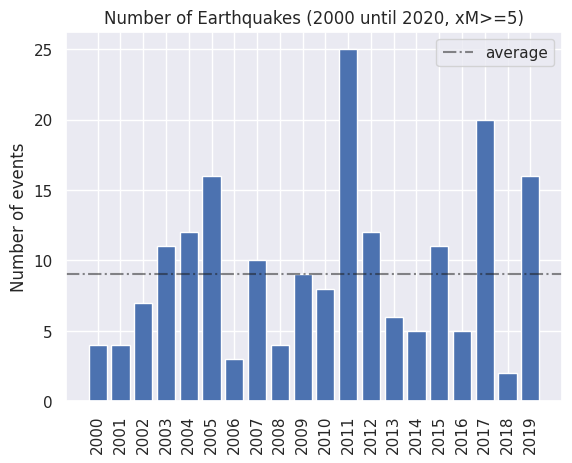

Total Earthquake 190
Average number of Earthquake: 9.05


In [10]:
xxx = range(20)
N_tot = data[data.xM >= 5].Year.count()
N_Ave = round(N_tot/((2020-2000+1)),2)

plt.bar(xxx,over_count.values())
plt.title("Number of Earthquakes (2000 until 2020, xM>=5)")
plt.ylabel('Number of events')
plt.xticks(xxx, over_count.keys(), rotation='vertical')
plt.axhline(y=N_Ave, color='k', linestyle='-.', alpha=0.5, label='average')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print('Total Earthquake', N_tot)
print('Average number of Earthquake:', N_Ave)

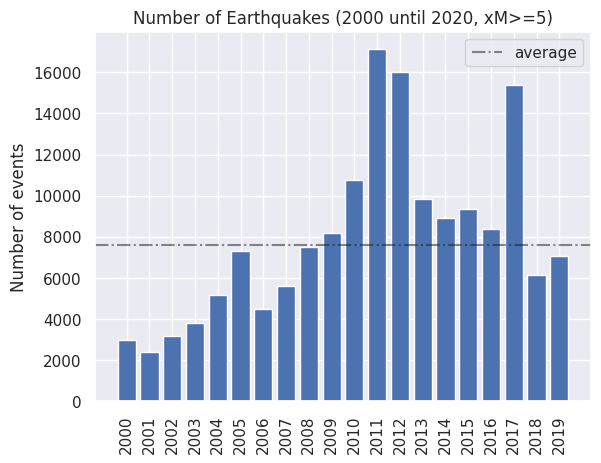

Total Earthquake 159394
Average number of Earthquake: 7590.19


In [11]:
xxx = range(20)
N_tott = data[data.xM < 5].Year.count()
N_Avee = round(N_tott/((2020-2000+1)),2)

plt.bar(xxx,under_count.values())
plt.title("Number of Earthquakes (2000 until 2020, xM>=5)")
plt.ylabel('Number of events')
plt.xticks(xxx, under_count.keys(), rotation='vertical')
plt.axhline(y=N_Avee, color='k', linestyle='-.', alpha=0.5, label='average')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print('Total Earthquake', N_tott)
print('Average number of Earthquake:', N_Avee)

In [12]:
#First I found city list on the Internet
marmara = 'ISTANBUL|iSTANBUL|EDIRNE|EDiRNE|KIRKLARELI|KIRKLARELi|TEKIRDAG|TEKiRDAĞ|ÇANAKKALE|CANAKKALE|KOCAELI|KOCAELi|YALOVA|SAKARYA|BILECIK|BiLECiK|BURSA|BALIKESIR|BALIKESiR|MARMARA'
aegean = 'IZMIR|iZMiR|MANISA|MANiSA|AYDIN|DENIZLI|DENiZLi|MUGLA|MUĞLA|AFYONKARAHISAR|AFYONKARAHiSAR|USAK|UŞAK|KUTAHYA|KÜTAHYA|EGE'
central_anatolia = 'ESKISEHIR|ESKiSEHiR|KONYA|ANKARA|CANKIRI|ÇANKIRI|AKSARAY|KIRIKKALE|KIRSEHIR|KIRSEHiR|YOZGAT|NIGDE|NiGDE|NEVSEHIR|NEVSEHiR|KAYSERI|KAYSERi|KARAMAN|SIVAS|SiVAS'
mediterranean = 'ANTALYA|BURDUR|ISPARTA|MERSIN|MERSiN|ADANA|HATAY|OSMANIYE|OSMANiYE|KAHRAMANMARAS|KAHRAMANMARAŞ|AKDENIZ|AKDENiZ'
black_sea = 'BOLU|DUZCE|DÜZCE|ZONGULDAK|KARABUK|KARABÜK|BARTIN|KASTAMONU|CORUM|ÇORUM|SINOP|SiNOP|SAMSUN|AMASYA|TOKAT|ORDU|GIRESUN|GiRESUN|GUMUSHANE|GÜMÜŞHANE|TRABZON|BAYBURT|RIZE|RiZE|ARTVIN|ARTViN|KARADENIZ|KARADENiZ'
eastern_anatolia = 'MALATYA|ERZINCAN|ERZiNCAN|ELAZIG|ELAZIĞ|TUNCELI|TUNCELi|BINGOL|BiNGOL|ERZURUM|MUS|MUŞ|BITLIS|BiTLiS|KARS|AGRI|AĞRI|ARDAHAN|VAN|IGDIR|IĞDIR|HAKKARI|HAKKARi'
southeastern_anatolia = 'GAZIANTEP|GAZiANTEP|KILIS|KiLiS|ADIYAMAN|SANLIURFA|ŞANLIURFA|DIYARBAKIR|DiYARBAKIR|MARDIN|MARDiN|BATMAN|SIIRT|SiiRT|SIRNAK|ŞIRNAK'

#then created a check list for each of them
check_marmara = data['Location'].str.contains(marmara).values
check_aegean = data['Location'].str.contains(aegean).values
check_central_anatolia = data['Location'].str.contains(central_anatolia).values
check_mediterranean = data['Location'].str.contains(mediterranean).values
check_black_sea = data['Location'].str.contains(black_sea).values
check_eastern_anatolia = data['Location'].str.contains(eastern_anatolia).values
check_southeastern_anatolia = data['Location'].str.contains(southeastern_anatolia).values

In [13]:
#I classified each row and appended to a list.
l=list()
for mar,aeg,can,med,bla,easan,souan in zip(check_marmara,check_aegean,check_central_anatolia,check_mediterranean, check_black_sea, check_eastern_anatolia, check_southeastern_anatolia ):
    if mar==True:
        l.append("Marmara")
    elif (aeg==True):
        l.append("Aegean")
    elif (can==True):
        l.append("Central Anatolia")
    elif (med==True):
        l.append("Mediterranean")
    elif (bla==True):
        l.append("Black Sea")
    elif (easan==True):
        l.append("Eastern Anatolia")
    elif (souan==True):
        l.append("Southeastern Anatolia")
    else:
        l.append("Unknown")

In [14]:
#now it is time to add a new column called region into the data
data["Region"] = l

In [15]:
#data with new column
data

,ID,Code,Date,Year,Time,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb,Type,Location,Region
29347,29348,20000101005508,2000.01.01,2000,00:55:08.30,37.9500,35.5400,0.0,3.3,3.3,0.0,NaN,0.0,0.0,Ke,DELIALIUSAGI-YAHYALI (KAYSERI) [North East 0....,Central Anatolia
29330,29331,20000101235656,2000.01.01,2000,23:56:56.60,40.8700,30.8400,0.0,2.6,2.6,0.0,NaN,0.0,0.0,Ke,DEDEDUZU-GUMUSOVA (DUZCE) [South West 2.2 km],Black Sea
29331,29332,20000101235045,2000.01.01,2000,23:50:45.30,39.1800,27.9900,6.0,3.0,3.0,0.0,NaN,0.0,0.0,Ke,AKKOCALI-AKHISAR (MANISA) [North East 0.9 km],Aegean
29332,29333,20000101210849,2000.01.01,2000,21:08:49.10,40.7700,30.8200,8.0,3.4,3.4,0.0,NaN,0.0,0.0,Ke,HARMANTEPE-HENDEK (SAKARYA) [North East 0.8 km],Marmara
29333,29334,20000101210736,2000.01.01,2000,21:07:36.80,40.7800,30.6200,5.0,2.6,2.6,0.0,NaN,0.0,0.0,Ke,YAGBASAN-HENDEK (SAKARYA) [North East 0.9 km],Marmara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,113295,20191231024157,2019.12.31,2019,02:41:57.82,40.7505,27.3865,13.8,2.0,0.0,2.0,0.0,0.0,0.0,Ke,GAZIKOY-SARKOY (TEKIRDAG) [East 4.7 km],Marmara
15,113296,20191231023323,2019.12.31,2019,02:33:23.40,39.0687,27.8587,8.3,2.0,0.0,2.0,0.0,0.0,0.0,Ke,SELCIKLI-AKHISAR (MANISA) [West 2.8 km],Aegean
16,113297,20191231020212,2019.12.31,2019,02:02:12.07,37.0308,43.0322,30.1,2.2,0.0,2.2,0.0,0.0,0.0,Ke,IRAK,Unknown
8,113289,20191231091250,2019.12.31,2019,09:12:50.64,37.9652,42.9640,1.5,2.3,0.0,2.3,0.0,0.0,0.0,Ke,KACIT-CATAK (VAN) [North West 4.1 km],Eastern Anatolia


**##Distribution of earthquakes (grouped by regions)**

In [16]:
print(data.groupby("Region").ID.count())

print('''Total data size:''',len(data),
'''\nAegean:''', '{:.2%}'.format(54658/len(data)),
'''\nBlack Sea:''','{:.2%}'.format(6795/len(data)),
'''\nCentral Anatolia:''','{:.2%}'.format(12879/len(data)),
'''\nEastern Anatolia:''','{:.2%}'.format(29476/len(data)),
'''\nMarmara:''','{:.2%}'.format(21339/len(data)),
'''\nMediterranean:''','{:.2%}'.format(27904/len(data)),
'''\nSoutheastern  Anatolia:''','{:.2%}'.format(4581/len(data)),
'''\nBorders:''','{:.2%}'.format(1952/len(data)))

Region
Aegean                   54347
Black Sea                 6752
Central Anatolia         12864
Eastern Anatolia         29479
Marmara                  21274
Mediterranean            27904
Southeastern Anatolia     4581
Unknown                   2383
Name: ID, dtype: int64
Total data size: 159584 
Aegean: 34.25% 
Black Sea: 4.26% 
Central Anatolia: 8.07% 
Eastern Anatolia: 18.47% 
Marmara: 13.37% 
Mediterranean: 17.49% 
Southeastern  Anatolia: 2.87% 
Borders: 1.22%


In [17]:
data.insert(4,"Month", data["Date"].str[5:7], True) #loc, column_name,value,repeating_val

In [18]:
se = list()
for item in data["Date"].values:
    mo = item[5:7]
    if (mo=='01' or mo=='12' or mo=='02' ):
        se.append("Winter")
    elif (mo=='03' or mo=='04' or mo=='05' ):
        se.append("Spring")
    elif (mo=='06' or mo=='07' or mo=='08' ):
        se.append("Summer")
    elif (mo=='09' or mo=='10' or mo=='11' ):
        se.append("Autumn")

In [19]:
#create new column
data["Season"]= se

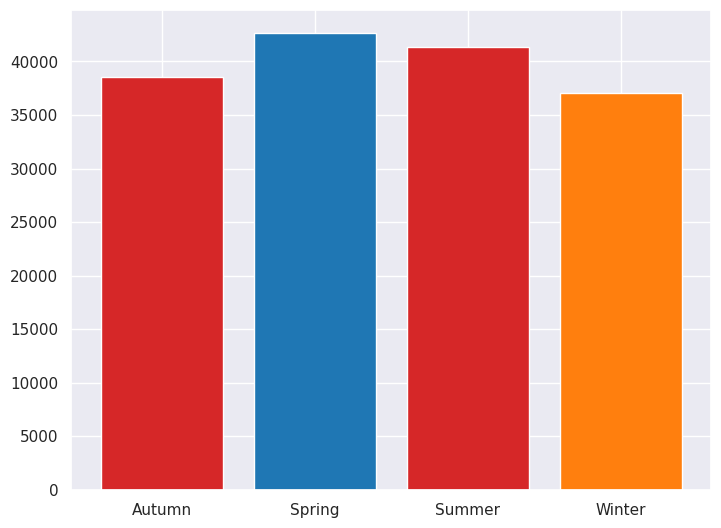

In [21]:
season_dist = data.groupby("Season").ID.count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [season_dist.keys()]
students = [season_dist.values]
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
bar_labels = ['red', 'blue', '_red', 'orange']
ax.bar(season_dist.keys(), season_dist.values, label=bar_labels, color=bar_colors)
#ax.bar_label(ax.bar, fmt='%.2f')
plt.show()

In [28]:
earthquake[earthquake['Location'].str.contains("ISTANBUL")]
data[(data.xM >= 3) & (data.xM < 9)] #greater than magnitude 3

,ID,Code,Date,Year,Month,Time,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb,Type,Location,Region,Season
29347,29348,20000101005508,2000.01.01,2000,01,00:55:08.30,37.9500,35.5400,0.0,3.3,3.3,0.0,NaN,0.0,0.0,Ke,DELIALIUSAGI-YAHYALI (KAYSERI) [North East 0....,Central Anatolia,Winter
29331,29332,20000101235045,2000.01.01,2000,01,23:50:45.30,39.1800,27.9900,6.0,3.0,3.0,0.0,NaN,0.0,0.0,Ke,AKKOCALI-AKHISAR (MANISA) [North East 0.9 km],Aegean,Winter
29332,29333,20000101210849,2000.01.01,2000,01,21:08:49.10,40.7700,30.8200,8.0,3.4,3.4,0.0,NaN,0.0,0.0,Ke,HARMANTEPE-HENDEK (SAKARYA) [North East 0.8 km],Marmara,Winter
29335,29336,20000101180141,2000.01.01,2000,01,18:01:41.70,40.8800,30.8500,7.0,3.3,3.3,0.0,NaN,0.0,0.0,Ke,DEDEDUZU-GUMUSOVA (DUZCE) [South West 0.9 km],Black Sea,Winter
29346,29347,20000101051358,2000.01.01,2000,01,05:13:58.10,38.8900,26.1800,11.0,3.1,3.1,0.0,NaN,0.0,0.0,Ke,EGE DENIZI,Aegean,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,113303,20191230195146,2019.12.30,2019,12,19:51:46.62,37.8417,29.6165,5.0,3.2,0.0,3.0,3.2,0.0,0.0,Ke,TUTLUCA-BOZKURT (DENIZLI) [South 1.8 km],Aegean,Winter
27,113308,20191230170559,2019.12.30,2019,12,17:05:59.41,39.0553,27.8375,5.6,3.2,0.0,3.2,3.1,0.0,0.0,Ke,MUSALAR-AKHISAR (MANISA) [North West 2.4 km],Aegean,Winter
34,113315,20191230074531,2019.12.30,2019,12,07:45:31.09,38.2663,26.3098,5.4,3.0,0.0,3.0,0.0,0.0,0.0,Ke,OVACIK-CESME (IZMIR) [South West 2.2 km],Aegean,Winter
30,113311,20191230143249,2019.12.30,2019,12,14:32:49.46,39.0593,27.8332,8.2,3.2,0.0,3.1,3.2,0.0,0.0,Ke,MUSALAR-AKHISAR (MANISA) [North West 2.9 km],Aegean,Winter
